## Clustering
    Clustering is the grouping of objects together so that objects belonging in the same group (cluster) are more similar to each other than those in other groups (clusters). In this intro cluster analysis tutorial, we'll check out a few algorithms in Python so you can get a basic understanding of the fundamentals of clustering on a real dataset.

    Let’s kick things off with a simple example. A bank wants to give credit card offers to its customers. Currently, they look at the details of each customer and based on this information, decide which offer should be given to which customer. 
    So what can the bank do? One option is to segment its customers into different groups. For instance, the bank can group the customers based on their income: 
   ![alt text](cluster.png "Title")
   
    Can you see where I’m going with this? The bank can now make three different strategies or offers, one for each group. Here, instead of creating different strategies for individual customers, they only have to make 3 strategies. This will reduce the effort as well as the time.

    The groups I have shown above are known as clusters and the process of creating these groups is known as clustering. Formally, we can say that: 
    
    " Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data "
    In clustering, we do not have a target to predict. We look at the data and then try to club similar observations and form different groups. Hence it is an unsupervised learning problem.

## Applications of Clustering:

    * Clustering helps marketers improve their customer base and work on the target areas. It helps group people (according to different criteria’s such as willingness, purchasing power etc.) based on their similarity in many ways related to the product under consideration.
    
    * Clustering helps in identification of groups of houses on the basis of their value, type and geographical locations.
    
    * Clustering is used to study earth-quake. Based on the areas hit by an earthquake in a region, clustering can help analyse the next probable location where earthquake can occur.

## 1. K-means Clustering

    As we will see, the k-means algorithm is extremely easy to implement and is also computationally very efficient compared to other clustering algorithms, which might explain its popularity. The k-means algorithm belongs to the category of prototype-based clustering.

    Prototype-based clustering means that each cluster is represented by a prototype, which can either be the centroid (average) of similar points with continuous features, or the medoid (the most representative or most frequently occurring point) in the case of categorical features.

### Implementation:

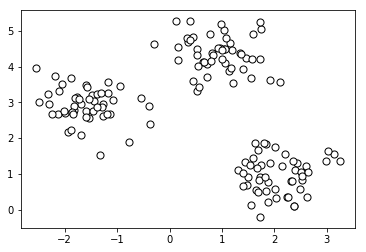

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# create dataset
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

    The dataset that we just created consists of 150 randomly generated points that are roughly grouped into three regions with higher density, which is visualized via a two-dimensional scatterplot.

In [3]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

    Using the preceding code, we set the number of desired clusters to 3. We set n_init=10 to run the k-means clustering algorithms 10 times independently with different random centroids to choose the final model as the one with the lowest SSE. Via the max_iter parameter, we specify the maximum number of iterations for each single run (here, 300).

    Note that the k-means implementation in scikit-learn stops early if it converges before the maximum number of iterations is reached. However, it is possible that k-means does not reach convergence for a particular run, which can be problematic (computationally expensive) if we choose relatively large values for max_iter.

    let’s visualize the clusters that k-means identified in the dataset together with the cluster centroids. These are stored under the cluster_centers_ attribute of the fitted KMeans object:

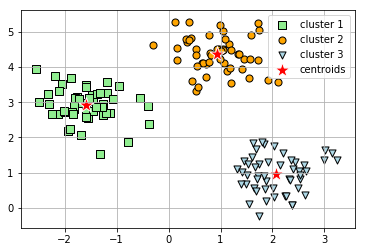

In [5]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='white',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

    In the resulting scatterplot, we can see that k-means placed the three centroids at the center of each sphere, which looks like a reasonable grouping given this dataset.

#### The Elbow Method

    Although k-means worked well on this toy dataset, it is important to reiterate that a drawback of k-means is that we have to specify the number of clusters, k, before we know what the optimal k is. The number of clusters to choose may not always be so obvious in real-world applications, especially if we are working with a higher dimensional dataset that cannot be visualized.

    The elbow method is a useful graphical tool to estimate the optimal number of clusters k for a given task. Intuitively, we can say that, if k increases, the within-cluster SSE (“distortion”) will decrease. This is because the samples will be closer to the centroids they are assigned to.

    The idea behind the elbow method is to identify the value of k where the distortion begins to decrease most rapidly, which will become clearer if we plot the distortion for different values of k:

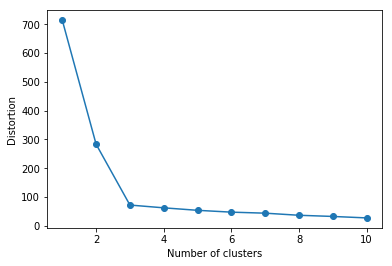

In [6]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

    As we can see in the resulting plot, the elbow is located at k = 3, which is evidence that k = 3 is indeed a good choice for this dataset.


## Unsupervised Nearest Neighbors

    Unsupervised nearest neighbors is the foundation of many other learning methods, notably manifold learning and spectral clustering.
     

    The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice.

### Approach Used:
    The approach behind this simple algorithm is to make a cluster of the points that are near to each other. To see how far a point is near to the other one we can use any distance metrics ie Manhattan distance , minkowski distance. 

### Implementation:

In [1]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2],[-9, 2],[4, 2]])
nbrs = NearestNeighbors(n_neighbors=2).fit(X)
distances, indices = nbrs.kneighbors(X)


In [4]:
indices

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 7],
       [6, 2],
       [7, 5]], dtype=int64)

    Here the first column is telling the index number of a point and the second column is telling its nearest neighbours.

In [20]:
distances

array([[ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.41421356],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  7.21110255],
       [ 0.        ,  1.        ]])

    Here the first column is telling the the distance of point with itself and the second column is telling its nearest neighbour distance.

## TO-DO LIST

1) Is k mean robust to outliers ? If not, do you think is there any clustering algoritm that can cluster the outliers as well ? HINT (DBSCAN algorithm)

2) How we can evaluate un-supervised algorithms ?

3) Is there any difference between nearest neighbour and KNN ? If yes, can you write them